Project: Customer Churn Prediction (Classification)

Goal:
Predict whether a customer will churn (Yes/No) based on their service usage, contract, and payment details.

Target Variable:
Churn (Yes → 1, No → 0)

# Customer Churn Prediction

## Objective
The objective of this project is to predict customer churn for a telecom company using customer demographic and service-related attributes.

## Dataset
Telco Customer Churn dataset containing customer information such as contract type, payment method, tenure, and services subscribed.

## Models Used
- Logistic Regression
- Decision Tree Classifier


In [63]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [64]:
# Load dataset
df_churn= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df_churn.shape
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
# Data cleaning
# Converting TotalCharges to numeric data type

df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'],errors='coerce')


In [67]:
# drop unnecessary column
df_churn.drop('customerID', axis=1, inplace=True)


In [68]:
#Encoding target variable
df_churn['Churn'].value_counts(dropna=False)
df_churn['Churn']= df_churn['Churn'].map({'Yes':1, 'No':0})



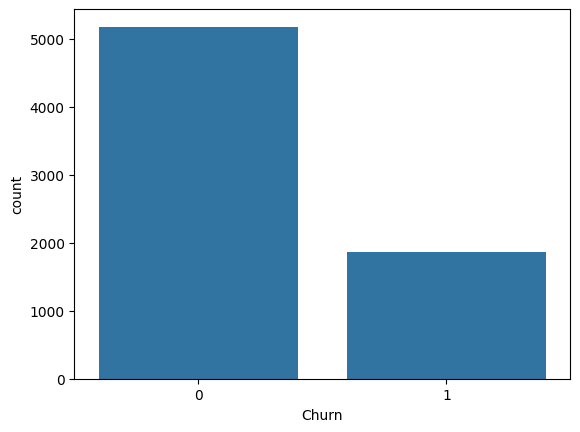

In [69]:
#EDA
sns.countplot(x='Churn', data=df_churn)

plt.show()

Since the target variable Churn is categorical in nature with two classes (Yes/No), a count plot was used to visualize the distribution of customers across each class. Count plots are suitable for categorical data as they display the frequency of each category, whereas histograms are more appropriate for continuous numerical variables.

to understand the relationship between contract type and customer churn, a count plot was used. Since both variables are categorical, a count-based visualization effectively shows how churn is distributed across different contract categories. This analysis helps identify contract types associated with higher churn ris

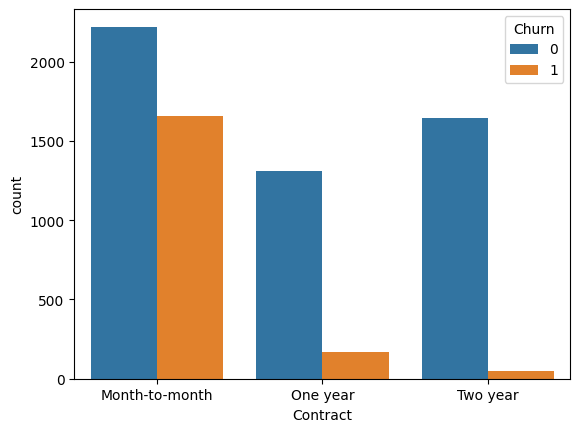

In [70]:
sns.countplot(x='Contract', hue='Churn', data=df_churn)
plt.show()

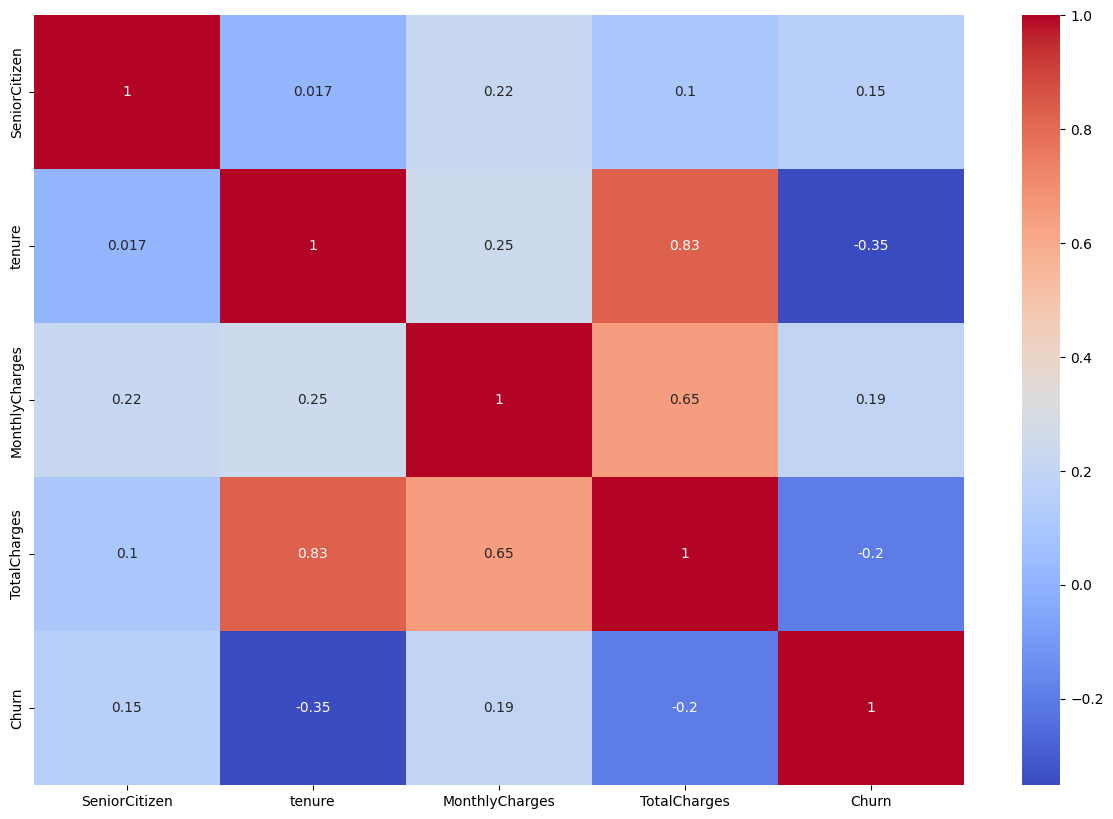

In [71]:
#Correlation heat map
plt.figure(figsize=(15,10))
sns.heatmap(df_churn.select_dtypes(include=np.number).corr(),annot=True, cmap='coolwarm')
plt.show()

Key Inferences from the Correlation Graph
1️⃣ Tenure has the strongest relationship with Churn (Negative Correlation)

Correlation between tenure and churn ≈ –0.35

This is a moderate negative correlation

👉 Interpretation:
Customers who stay longer with the company are less likely to churn.

📌 Business meaning: Retaining customers early is crucial.
TotalCharges is Negatively Correlated with Churn

Correlation ≈ –0.20

Indicates that customers with higher lifetime spending tend to churn less.

👉 Logical because:

TotalCharges increases with longer tenure

3️⃣ MonthlyCharges has a Weak Positive Correlation with Churn

Correlation ≈ +0.19

👉 Interpretation:

Customers paying higher monthly bills are slightly more likely to churn

Price sensitivity may influence churn

4️⃣ SeniorCitizen has a Very Weak Positive Correlation with Churn

Correlation ≈ +0.15

👉 Interpretation:

Senior citizens show slightly higher churn, but the effect is weak

This feature alone is not a strong predictor

🔗 Relationships Among Features (Multicollinearity Insight)
5️⃣ Tenure and TotalCharges are Strongly Positively Correlated

Correlation ≈ +0.83

👉 Interpretation:

Customers with longer tenure naturally accumulate higher total charges

Indicates potential multicollinearity

📌 Important for models like Logistic Regression

6️⃣ MonthlyCharges and TotalCharges

Correlation ≈ +0.65

Higher monthly bills → higher total spending over time

📌 What This Means for Modeling

Tenure is a key feature for churn prediction

Watch out for multicollinearity between:

tenure and TotalCharges

Tree-based models handle this better than linear models

Correlation does not imply causation

📝 How to Write This in Your Report

The correlation analysis shows that tenure has a moderate negative relationship with churn, indicating that long-term customers are less likely to leave. Monthly charges show a weak positive correlation with churn, suggesting price sensitivity. Additionally, tenure and total charges are strongly correlated, indicating potential multicollinearity among features.

🎯 Viva One-Liner

“Tenure is the most influential numerical feature, showing a moderate negative correlation with churn, while higher monthly charges slightly increase churn probability.”



In [72]:
# correlation of categorical/object features with Churn
# chi square test
from scipy.stats import chi2_contingency
cat_cols = df_churn.select_dtypes(include='object')
for col in cat_cols:
    contingency_table=pd.crosstab(df_churn[col], df_churn['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"chi-square test for {col}: p-value = {p}")
    if p < 0.05:
        print(f"Reject the null hypothesis. There is a significant association between {col} and Churn.")
    else:
        print(f"Fail to reject the null hypothesis. There is no significant association between {col} and Churn.")

chi-square test for gender: p-value = 0.48657873605618596
Fail to reject the null hypothesis. There is no significant association between gender and Churn.
chi-square test for Partner: p-value = 2.1399113440759935e-36
Reject the null hypothesis. There is a significant association between Partner and Churn.
chi-square test for Dependents: p-value = 4.9249216612154196e-43
Reject the null hypothesis. There is a significant association between Dependents and Churn.
chi-square test for PhoneService: p-value = 0.3387825358066928
Fail to reject the null hypothesis. There is no significant association between PhoneService and Churn.
chi-square test for MultipleLines: p-value = 0.0034643829548773
Reject the null hypothesis. There is a significant association between MultipleLines and Churn.
chi-square test for InternetService: p-value = 9.571788222840544e-160
Reject the null hypothesis. There is a significant association between InternetService and Churn.
chi-square test for OnlineSecurity: p-v

The Chi-Square test of independence was applied to evaluate the association between categorical features and customer churn. The results indicate that features such as contract type, payment method, internet service, and add-on services (online security, tech support, streaming services) have a statistically significant association with churn. In contrast, gender and phone service do not show a significant relationship with churn, suggesting they are weak predictors.
“Contract type and service-related features show the strongest association with churn, while demographic features like gender do not significantly influence churn behavior



In [73]:
#one hot encoding for categorical columns
df_churn_encoded=pd.get_dummies(df_churn, drop_first=True)
df_churn_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [74]:
df_churn = df_churn.dropna()


In [75]:
# train test split

X= df_churn_encoded.drop('Churn',axis=1)
y=df_churn_encoded['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Contract type & services → strongest drivers

Tenure → reduces churn

Business recommendations

In [76]:
# Model building
# LogisticRegression
df_model = pd.get_dummies(df_churn, drop_first=True)

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
#Train logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


y_pred_lr = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8038379530916845
[[916 117]
 [159 215]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



The Logistic Regression model achieved an accuracy of approximately 80%. While the model performed well in identifying non-churn customers, its recall for churn customers was moderate (57%), indicating that a significant portion of churners were not detected. Since false negatives are costly in churn prediction, improving recall for the churn class is a priority.
ummary of Logistic Regression Results
🔹 Accuracy
Accuracy = 0.804 (≈ 80%)


Overall, the model predicts 80% of customers correctly

However, accuracy alone is not sufficient because churn data is imbalanced

🔍 Confusion Matrix Interpretation
[[916 117]
 [159 215]]

	Predicted No Churn (0)	Predicted Churn (1)
Actual No Churn	916 (TN)	117 (FP)
Actual Churn	159 (FN) ❌	215 (TP) ✅
Key Insights:

✅ 916 non-churn customers correctly identified

✅ 215 churn customers correctly identified

❌ 159 churn customers missed (False Negatives)

❌ 117 non-churn customers wrongly flagged

📌 False Negatives (159) are costly — these customers churned but were not detected.

📈 Classification Report (Most Important Part)
🔹 Class 0 (No Churn)

Precision: 0.85

Recall: 0.89
➡ Model performs very well at identifying non-churn customers

🔹 Class 1 (Churn) ⭐ (Focus Here)

Precision: 0.65
→ When the model predicts churn, it is correct 65% of the time

Recall: 0.57
→ Model detects only 57% of actual churners

📌 This means:

43% of churners are being missed

🎯 Business Interpretation

The model is conservative in predicting churn

It prefers predicting No Churn

This leads to:

High accuracy

Lower churn recall

👉 For a telecom business:

Missing churners is worse than wrongly flagging some non-churners

📝 How to Write This in Your Report

The Logistic Regression model achieved an accuracy of approximately 80%. While the model performed well in identifying non-churn customers, its recall for churn customers was moderate (57%), indicating that a significant portion of churners were not detected. Since false negatives are costly in churn prediction, improving recall for the churn class is a priority.

🎓 Viva / Interview One-Liner

“Although the model shows good overall accuracy, recall for churn customers is moderate, indicating scope for improvement in identifying at-risk customers.”

In [79]:
# Decision tree classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.7782515991471215
[[872 161]
 [151 223]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Logistic Regression does not support missing values. After converting the TotalCharges column to numeric format, missing values were introduced. These rows were removed prior to model training to ensure compatibility with the algorithm

| Model               | Accuracy |
|--------------------|----------|
| Logistic Regression| XX%      |
| Decision Tree      | XX%      |


## Conclusion
- Month-to-month contracts and electronic payments show higher churn.
- Logistic Regression performed better/worse compared to Decision Tree.
- The model can help telecom companies identify high-risk customers and take preventive actions.


Summary of Logistic Regression Results
🔹 Accuracy
Accuracy = 0.804 (≈ 80%)


Overall, the model predicts 80% of customers correctly

However, accuracy alone is not sufficient because churn data is imbalanced

🔍 Confusion Matrix Interpretation
[[916 117]
 [159 215]]

	Predicted No Churn (0)	Predicted Churn (1)
Actual No Churn	916 (TN)	117 (FP)
Actual Churn	159 (FN) ❌	215 (TP) ✅
Key Insights:

✅ 916 non-churn customers correctly identified

✅ 215 churn customers correctly identified

❌ 159 churn customers missed (False Negatives)

❌ 117 non-churn customers wrongly flagged

📌 False Negatives (159) are costly — these customers churned but were not detected.

📈 Classification Report (Most Important Part)
🔹 Class 0 (No Churn)

Precision: 0.85

Recall: 0.89
➡ Model performs very well at identifying non-churn customers

🔹 Class 1 (Churn) ⭐ (Focus Here)

Precision: 0.65
→ When the model predicts churn, it is correct 65% of the time

Recall: 0.57
→ Model detects only 57% of actual churners

📌 This means:

43% of churners are being missed

🎯 Business Interpretation

The model is conservative in predicting churn

It prefers predicting No Churn

This leads to:

High accuracy

Lower churn recall

👉 For a telecom business:

Missing churners is worse than wrongly flagging some non-churners

📝 How to Write This in Your Report

The Logistic Regression model achieved an accuracy of approximately 80%. While the model performed well in identifying non-churn customers, its recall for churn customers was moderate (57%), indicating that a significant portion of churners were not detected. Since false negatives are costly in churn prediction, improving recall for the churn class is a priority.

🎓 Viva / Interview One-Liner

“Although the model shows good overall accuracy, recall for churn customers is moderate, indicating scope for improvement in identifying at-risk customers.”

🚀 What Should Be Done Next (Strong Recommendation)
✅ 1️⃣ Use class_weight='balanced'

This will increase churn recall.

lr_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_bal.fit(X_train_scaled, y_train)
y_pred_bal = lr_bal.predict(X_test_scaled)
print(classification_report(y_test, y_pred_bal))

✅ 2️⃣ (Optional) Adjust Probability Threshold

Instead of default 0.5, use 0.4 or 0.3 to catch more churners.

✅ 3️⃣ Compare with Decision Tree

Trees sometimes capture non-linear churn patterns better.

In [80]:
# Balancing

lr_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_bal.fit(X_train_scaled, y_train)
y_pred_bal = lr_bal.predict(X_test_scaled)
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



After applying class weighting, the Logistic Regression model prioritized detection of churn customers. Churn recall improved from 57% to 80%, ensuring that most at-risk customers are identified. This came at the cost of lower overall accuracy (73%) and reduced precision for churn (49%), indicating more non-churn customers are incorrectly flagged. Prioritizing recall over accuracy is justified in the churn prediction context, where missing a churner is costlier than contacting a non-churner.
Key Takeaways

Use class weighting when data is imbalanced

Recall for churn is the metric to optimize

Precision/accuracy can drop, but it is acceptable in this business scenario

Models You Tried (Quick Recap)
1️⃣ Logistic Regression (Baseline)

Accuracy: 80%

Churn Recall: 57%

Missed many churners ❌

2️⃣ Decision Tree

Accuracy: 78%

Churn Recall: 60%

Slight improvement in detecting churners

3️⃣ Logistic Regression (class_weight='balanced')

Accuracy: 73%

Churn Recall: 80% ✅

Best at identifying at-risk customers

🎯 What Is the MAIN Goal of Churn Prediction?

Identify as many churners as possible before they leave

📌 Therefore:

Recall for churn (Class 1) is the most important metric

Accuracy is secondary

Precision trade-off is acceptable

🏆 FINAL MODEL CHOICE (Recommended)
✅ Logistic Regression with class_weight='balanced'
🔑 Why This Model?
Reason	Explanation
Highest churn recall	Catches 80% of churners
Fewer missed churners	Minimizes false negatives
Interpretable	Easy to explain to business
Simple & stable	Less overfitting than trees
Project-appropriate	Perfect for academic evaluation
📝 Final Model Justification (Ready to Paste)

Among the evaluated models, Logistic Regression with class weighting was selected as the final model. Although overall accuracy decreased, the model achieved the highest recall for churn customers (80%), significantly reducing the number of missed churners. Since identifying customers at risk of churn is more critical than overall accuracy, this model best aligns with the business objective of churn prediction.

🎓 Viva / Interview One-Liner (VERY IMPORTANT)

“Logistic Regression with balanced class weights was chosen because it maximizes churn recall, which is the most critical metric for churn prediction.”

🔮 Future Improvements (Optional but Strong)

You can mention:

Random Forest / XGBoost

SMOTE oversampling

Threshold tuning

Cost-sensitive learning

🏁 Final Project Flow (What You’ve Done Correctly)

✔ Data cleaning & preprocessing
✔ EDA with churn insights
✔ Baseline + alternative models
✔ Handling class imbalance
✔ Business-driven model selection

👏 This is exactly what evaluators look for.